<a href="https://colab.research.google.com/github/Grashch/Data-science/blob/main/k_NN_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits  # Импорт функции для загрузки набора данных рукописных цифр
from sklearn.model_selection import train_test_split  # Импорт функции для разбиения данных на обучающую и тестовую выборки
from sklearn.neighbors import KNeighborsClassifier  # Импорт классификатора k-ближайших соседей
from sklearn.metrics import classification_report  # Импорт функции для оценки качества модели
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import numpy as np  # Импорт библиотеки NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации

In [2]:
# Загрузка набора данных рукописных цифр
data = load_digits()

# Просмотр ключей словаря с данными
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# Размеры данных и изображений, а также максимальное значение в изображениях
data.data.shape  # Размерность массива признаков (количество образцов, количество признаков)
data.target.shape  # Размерность массива целевых меток
data.images.shape  # Размерность массива изображений (количество изображений, высота, ширина)
np.max(data.images)  # Максимальное значение пикселя в изображениях
data.data.shape, data.target.shape, data.images.shape, np.max(data.images)

((1797, 64), (1797,), (1797, 8, 8), np.float64(16.0))

In [4]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
np.unique(data.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

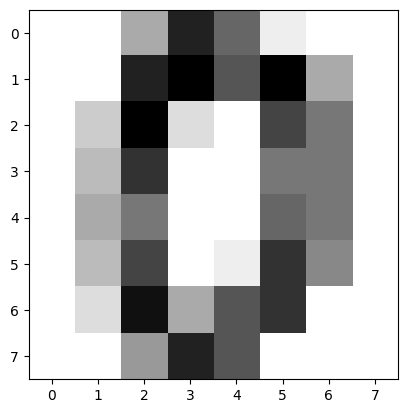

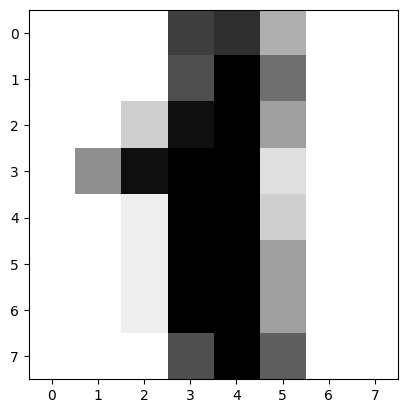

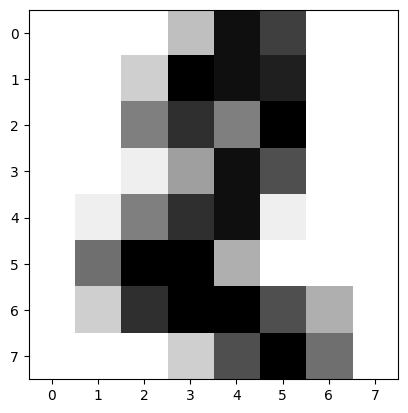

In [6]:
# Вывод первых нескольких изображений для визуализации
for image in data.images[:3]:
    plt.imshow(image, cmap=plt.cm.binary)  # Отображение изображения в черно-белой гамме
    plt.show()  # Показ изображения

In [7]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.data,  # Признаки
    data.target,  # Метки
    test_size=0.5  # Размер тестовой выборки (50% данных)
)

# Проверка размеров полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [8]:
# Создание экземпляра классификатора k-ближайших соседей с использованием полного перебора
classifier = KNeighborsClassifier(algorithm='brute')

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [9]:
# Предсказание меток для тестовых данных
y_pred = classifier.predict(X_test)

In [10]:
# Вывод отчета о классификации, включающего метрики точности, полноты, F1-меры и матрицу ошибок
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.90      1.00      0.95        90
           2       0.99      0.92      0.95        98
           3       0.98      0.99      0.98        85
           4       1.00      0.99      0.99        90
           5       0.99      0.99      0.99        97
           6       1.00      1.00      1.00        88
           7       0.97      1.00      0.98        86
           8       0.94      0.88      0.91        96
           9       0.97      0.99      0.98        74

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [11]:
# Испортим модель увеличив параметр k-ближайших соседей для наглядности преобразований
# Создание экземпляра классификатора k-ближайших соседей с использованием полного перебора
classifier = KNeighborsClassifier(n_neighbors=200, algorithm='brute')

# Обучение модели на обучающих данных
classifier.fit(X_train, y_train)

# Предсказание меток для тестовых данных
y_pred = classifier.predict(X_test)

# Вывод отчета о классификации, включающего метрики точности, полноты, F1-меры и матрицу ошибок
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        95
           1       0.81      0.70      0.75        90
           2       0.86      0.69      0.77        98
           3       0.72      0.89      0.80        85
           4       0.97      0.82      0.89        90
           5       0.97      0.66      0.79        97
           6       0.81      1.00      0.90        88
           7       0.82      1.00      0.90        86
           8       0.94      0.62      0.75        96
           9       0.56      0.88      0.68        74

    accuracy                           0.82       899
   macro avg       0.84      0.83      0.82       899
weighted avg       0.85      0.82      0.82       899



In [12]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.9313725490196079,
  'recall': 1.0,
  'f1-score': 0.9644670050761421,
  'support': 95.0},
 '1': {'precision': 0.8076923076923077,
  'recall': 0.7,
  'f1-score': 0.75,
  'support': 90.0},
 '2': {'precision': 0.8607594936708861,
  'recall': 0.6938775510204082,
  'f1-score': 0.768361581920904,
  'support': 98.0},
 '3': {'precision': 0.7238095238095238,
  'recall': 0.8941176470588236,
  'f1-score': 0.8,
  'support': 85.0},
 '4': {'precision': 0.9736842105263158,
  'recall': 0.8222222222222222,
  'f1-score': 0.891566265060241,
  'support': 90.0},
 '5': {'precision': 0.9696969696969697,
  'recall': 0.6597938144329897,
  'f1-score': 0.7852760736196319,
  'support': 97.0},
 '6': {'precision': 0.8148148148148148,
  'recall': 1.0,
  'f1-score': 0.8979591836734694,
  'support': 88.0},
 '7': {'precision': 0.819047619047619,
  'recall': 1.0,
  'f1-score': 0.900523560209424,
  'support': 86.0},
 '8': {'precision': 0.9375,
  'recall': 0.625,
  'f1-score': 0.75,
  'support': 96.0}

In [13]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[95,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 63, 10,  2,  0,  0,  6,  1,  1,  7],
       [ 2,  4, 68, 15,  0,  0,  0,  5,  3,  1],
       [ 1,  0,  0, 76,  0,  0,  0,  4,  0,  4],
       [ 3,  5,  0,  0, 74,  0,  7,  1,  0,  0],
       [ 1,  0,  0,  2,  1, 64,  2,  1,  0, 26],
       [ 0,  0,  0,  0,  0,  0, 88,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  0],
       [ 0,  6,  1,  6,  0,  1,  5,  4, 60, 13],
       [ 0,  0,  0,  4,  1,  1,  0,  3,  0, 65]])

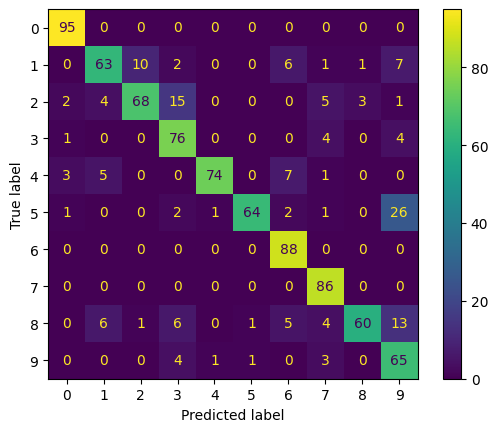

In [14]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion)
display.plot()
plt.show()

In [15]:
macro_avg_f1 = np.mean([report_dict[str(lable)]['f1-score'] for lable in range(10)])
macro_avg_f1

np.float64(0.8192364195875601)

In [16]:
nom = np.sum([report_dict[str(lable)]['f1-score'] * report_dict[str(lable)]['support'] for lable in range(10)])
denom = np.sum([report_dict[str(lable)]['support'] for lable in range(10)])
weighted_avg_f1 = nom / denom
weighted_avg_f1

np.float64(0.8208382166803695)

In [21]:
parame_grid = {
    'n_neighbors':[3, 4],
    'weights':['uniform', 'distance'],
    'p':[2, 3]
    }

classifier = KNeighborsClassifier(algorithm='brute')
clf = GridSearchCV(classifier, parame_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'n_neighbors': [3, 4], 'p': [2, 3],
                         'weights': ['uniform', 'distance']})

In [23]:
clf.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [24]:
clf.best_score_

np.float64(0.9788578522656735)

In [27]:
classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='brute', p=2)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.89      1.00      0.94        90
           2       1.00      0.94      0.97        98
           3       0.99      0.99      0.99        85
           4       1.00      1.00      1.00        90
           5       0.99      0.98      0.98        97
           6       1.00      1.00      1.00        88
           7       0.98      1.00      0.99        86
           8       0.97      0.90      0.93        96
           9       0.96      0.97      0.97        74

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

